In [1]:
import pandas as pd
import numpy as np
import design_class_dictionary

import matplotlib.pyplot as plt
%matplotlib inline  

# Discete Mainclass analysis

In [2]:
master = pd.read_csv('data/master.csv')
d2d_seen = pd.read_csv('data/final_main_d2d_seen.csv')
d2d_seen_cont = pd.read_csv('data/final_main_d2d_seen_cont.csv')
d2u_seen = pd.read_csv('data/final_main_d2u_seen.csv')
d2u_seen_cont = pd.read_csv('data/final_main_d2u_seen_cont.csv')

In [3]:
patent_classifications = pd.read_csv('data/uspc_current.tsv', delimiter = '\t', usecols=['patent_id','mainclass_id','sequence'], dtype={'patent_id':str, 'mainclass_id':str})
patent_classifications.head()

,patent_id,mainclass_id,sequence
0,3930271,2,0
1,3930271,2,1
2,3930271,2,2
3,3930271,473,3
4,3930272,5,0


In [4]:
listed_patents = list(set(list(d2d_seen.patent_number.unique()) + list(d2u_seen.patent_number.unique())))

In [5]:
patent_classifications = patent_classifications[patent_classifications['patent_id'].isin(listed_patents)]
patent_classifications.head()

,patent_id,mainclass_id,sequence
21969998,D257752,D19,0
21970267,D257924,D06,0
21970995,D258382,D23,0
21970996,D258383,D23,0
21971443,D258678,D23,0


How many patents have more than one mainclass?

In [6]:
#select all first classifications
patent_classifications = patent_classifications.loc[patent_classifications.sequence == 0]
patent_classifications.head()

,patent_id,mainclass_id,sequence
21969998,D257752,D19,0
21970267,D257924,D06,0
21970995,D258382,D23,0
21970996,D258383,D23,0
21971443,D258678,D23,0


In [7]:
patent_classifications = patent_classifications.rename(index=str, columns={'patent_id':'patent_number'})

Let's examine how many novel combinations exist in the discrete measure

In [8]:
d2d_novel_count = d2d_seen.loc[d2d_seen.first_seen == 1].groupby('focal_mainclass')['patent_number'].count().to_frame().reset_index().rename(index=str, columns={'patent_number': 'novelty_count'})
d2d_novel_count

,focal_mainclass,novelty_count
0,D01,21
1,D02,48
2,D03,45
3,D04,44
4,D05,25
5,D06,65
6,D07,55
7,D08,43
8,D09,58
9,D10,43


In [9]:
d2u_novel_count = d2u_seen.loc[d2u_seen.first_seen == 1].groupby('focal_mainclass')['patent_number'].count().to_frame().reset_index().rename(index=str, columns={'patent_number': 'novelty_count'})
d2u_novel_count

,focal_mainclass,novelty_count
0,D01,305
1,D02,444
2,D03,510
3,D04,349
4,D05,411
5,D06,673
6,D07,532
7,D08,751
8,D09,575
9,D10,593


In [10]:
print('Design to design number:',d2d_seen.loc[d2d_seen.first_seen == 1].patent_number.nunique(),'\n',
      'Design to design percentage of dataset', d2d_seen.loc[d2d_seen.first_seen == 1].patent_number.nunique()/master.patent_number.nunique(), '\n',
     'Design to utility number:',d2u_seen.loc[d2u_seen.first_seen == 1].patent_number.nunique(),'\n',
      'Design to utility percentage of dataset', d2u_seen.loc[d2u_seen.first_seen == 1].patent_number.nunique()/master.patent_number.nunique())

Design to design number: 1026 
 Design to design percentage of dataset 0.0019524634150982893 
 Design to utility number: 10496 
 Design to utility percentage of dataset 0.019973738796171193


Examin all design patents together to see how many patents are novel in total

In [11]:
all_seen = pd.concat([d2d_seen, d2u_seen])
print('all novel design patents:', all_seen.loc[all_seen.first_seen == 1].patent_number.nunique())
print('percent of dataset novel:', all_seen.loc[all_seen.first_seen == 1].patent_number.nunique()/master.patent_number.nunique())

all novel design patents: 11175
percent of dataset novel: 0.021265866143979906


means table for each focal design catagory

In [12]:
d2d_means_table = d2d_seen.groupby('focal_mainclass')['first_seen'].describe().reset_index()
# d2d_means_table

In [13]:
d2u_means_table = d2u_seen.groupby('focal_mainclass')['first_seen'].describe().reset_index()
d2u_means_table

,focal_mainclass,count,mean,std,min,25%,50%,75%,max
0,D01,4944.0,0.061691,0.240618,0.0,0.0,0.0,0.0,1.0
1,D02,31882.0,0.013926,0.117187,0.0,0.0,0.0,0.0,1.0
2,D03,52616.0,0.009693,0.097975,0.0,0.0,0.0,0.0,1.0
3,D04,12818.0,0.027227,0.162752,0.0,0.0,0.0,0.0,1.0
4,D05,8260.0,0.049758,0.217457,0.0,0.0,0.0,0.0,1.0
5,D06,86547.0,0.007776,0.087839,0.0,0.0,0.0,0.0,1.0
6,D07,72832.0,0.007304,0.085154,0.0,0.0,0.0,0.0,1.0
7,D08,102477.0,0.007328,0.085293,0.0,0.0,0.0,0.0,1.0
8,D09,84551.0,0.006801,0.082186,0.0,0.0,0.0,0.0,1.0
9,D10,42228.0,0.014043,0.117669,0.0,0.0,0.0,0.0,1.0


In [14]:
d2d_main_table = pd.merge(d2d_novel_count, d2d_means_table, on='focal_mainclass', how='inner')
d2d_main_table

,focal_mainclass,novelty_count,count,mean,std,min,25%,50%,75%,max
0,D01,21,6593.0,0.003185,0.056352,0.0,0.0,0.0,0.0,1.0
1,D02,48,27623.0,0.001738,0.041650,0.0,0.0,0.0,0.0,1.0
2,D03,45,38424.0,0.001171,0.034202,0.0,0.0,0.0,0.0,1.0
3,D04,44,7819.0,0.005627,0.074809,0.0,0.0,0.0,0.0,1.0
4,D05,25,5015.0,0.004985,0.070436,0.0,0.0,0.0,0.0,1.0
5,D06,65,79474.0,0.000818,0.028587,0.0,0.0,0.0,0.0,1.0
6,D07,55,59429.0,0.000925,0.030408,0.0,0.0,0.0,0.0,1.0
7,D08,43,59637.0,0.000721,0.026843,0.0,0.0,0.0,0.0,1.0
8,D09,58,67506.0,0.000859,0.029299,0.0,0.0,0.0,0.0,1.0
9,D10,43,31618.0,0.001360,0.036853,0.0,0.0,0.0,0.0,1.0


In [15]:
d2d_main_table.drop(labels=['min','25%','50%','75%','max'], axis=1, inplace=True)
d2d_main_table['class_name'] = d2d_main_table['focal_mainclass'].map(design_class_dictionary.class_labels)
d2d_main_table

,focal_mainclass,novelty_count,count,mean,std,class_name
0,D01,21,6593.0,0.003185,0.056352,Edible Products
1,D02,48,27623.0,0.001738,0.041650,Apparel and Haberdashery
2,D03,45,38424.0,0.001171,0.034202,"Travel Goods, Personal Belongings, and Storage..."
3,D04,44,7819.0,0.005627,0.074809,Brushware
4,D05,25,5015.0,0.004985,0.070436,Textile or Paper Yard Goods; Sheet Material
5,D06,65,79474.0,0.000818,0.028587,Furnishings
6,D07,55,59429.0,0.000925,0.030408,Equipment for Preparing or Serving Food or Dri...
7,D08,43,59637.0,0.000721,0.026843,Tools and Hardware
8,D09,58,67506.0,0.000859,0.029299,Packages and Containers for Goods
9,D10,43,31618.0,0.001360,0.036853,"Measuring, Testing or Signaling Instruments"


In [16]:
d2u_main_table = pd.merge(d2u_novel_count, d2u_means_table, on='focal_mainclass', how='inner').drop(labels=['min','25%','50%','75%','max'], axis=1)
d2u_main_table['class_name'] = d2u_main_table['focal_mainclass'].map(design_class_dictionary.class_labels)
d2u_main_table

,focal_mainclass,novelty_count,count,mean,std,class_name
0,D01,305,4944.0,0.061691,0.240618,Edible Products
1,D02,444,31882.0,0.013926,0.117187,Apparel and Haberdashery
2,D03,510,52616.0,0.009693,0.097975,"Travel Goods, Personal Belongings, and Storage..."
3,D04,349,12818.0,0.027227,0.162752,Brushware
4,D05,411,8260.0,0.049758,0.217457,Textile or Paper Yard Goods; Sheet Material
5,D06,673,86547.0,0.007776,0.087839,Furnishings
6,D07,532,72832.0,0.007304,0.085154,Equipment for Preparing or Serving Food or Dri...
7,D08,751,102477.0,0.007328,0.085293,Tools and Hardware
8,D09,575,84551.0,0.006801,0.082186,Packages and Containers for Goods
9,D10,593,42228.0,0.014043,0.117669,"Measuring, Testing or Signaling Instruments"


# Discrete Subclass Analysis

In [18]:
d2d_sub_seen = pd.read_csv('data/final_sub_d2d_seen.csv')
d2d_sub_seen_cont = pd.read_csv('data/final_sub_d2d_seen_cont.csv')
d2u_sub_seen = pd.read_csv('data/final_sub_d2u_seen.csv')
d2u_sub_seen_cont = pd.read_csv('data/final_sub_d2u_seen_cont.csv')

In [19]:
d2d_sub_seen[['mainclass', 'subclass']] = d2d_sub_seen['focal_subclass'].str.split('/', expand=True)
d2u_sub_seen[['mainclass', 'subclass']] = d2u_sub_seen['focal_subclass'].str.split('/', expand=True)

In [20]:
d2d_sub_seen['mainclass'] =  d2d_sub_seen['mainclass'].replace(design_class_dictionary.class_dictionary)
d2u_sub_seen['mainclass'] =  d2u_sub_seen['mainclass'].replace(design_class_dictionary.class_dictionary)

In [21]:
d2d_count = d2d_sub_seen.loc[d2d_sub_seen.first_seen == 1].groupby('mainclass')['patent_number'].count().to_frame().reset_index()
d2u_count = d2u_sub_seen.loc[d2u_sub_seen.first_seen == 1].groupby('mainclass')['patent_number'].count().to_frame().reset_index()

In [22]:
d2d_sub_means_table = d2d_sub_seen.groupby('mainclass')['first_seen'].describe().reset_index()
d2u_sub_means_table = d2u_sub_seen.groupby('mainclass')['first_seen'].describe().reset_index()


In [23]:
d2d_sub_table = pd.merge(d2d_count, d2d_sub_means_table, on='mainclass', how='inner')\
.drop(labels=['min','25%','50%','75%','max'], axis=1)
d2d_sub_table['class_name'] = d2d_sub_table['mainclass'].map(design_class_dictionary.class_labels)
d2d_sub_table

,mainclass,patent_number,count,mean,std,class_name
0,D01,5799,20159.0,0.287663,0.452684,Edible Products
1,D02,20300,255304.0,0.079513,0.270538,Apparel and Haberdashery
2,D03,30257,159724.0,0.189433,0.391853,"Travel Goods, Personal Belongings, and Storage..."
3,D04,4396,28472.0,0.154397,0.361336,Brushware
4,D05,5121,21382.0,0.239501,0.426789,Textile or Paper Yard Goods; Sheet Material
5,D06,60128,302750.0,0.198606,0.398951,Furnishings
6,D07,62145,388858.0,0.159814,0.366434,Equipment for Preparing or Serving Food or Dri...
7,D08,29630,176773.0,0.167616,0.373526,Tools and Hardware
8,D09,70817,684321.0,0.103485,0.304592,Packages and Containers for Goods
9,D10,19002,115692.0,0.164246,0.370501,"Measuring, Testing or Signaling Instruments"


In [24]:
d2u_sub_table = pd.merge(d2u_count, d2u_sub_means_table, on='mainclass', how='inner') \
.drop(labels=['min','25%','50%','75%','max'], axis=1)
d2u_sub_table['class_name'] = d2u_sub_table['mainclass'].map(design_class_dictionary.class_labels)
d2u_sub_table

,mainclass,patent_number,count,mean,std,class_name
0,D01,15344,32573.0,0.471065,0.499170,Edible Products
1,D02,73824,251377.0,0.293678,0.455447,Apparel and Haberdashery
2,D03,117707,280794.0,0.419193,0.493428,"Travel Goods, Personal Belongings, and Storage..."
3,D04,23053,66220.0,0.348127,0.476380,Brushware
4,D05,30129,60351.0,0.499230,0.500004,Textile or Paper Yard Goods; Sheet Material
5,D06,198972,453547.0,0.438702,0.496229,Furnishings
6,D07,194228,479789.0,0.404820,0.490858,Equipment for Preparing or Serving Food or Dri...
7,D08,196784,470704.0,0.418063,0.493241,Tools and Hardware
8,D09,280597,679096.0,0.413192,0.492407,Packages and Containers for Goods
9,D10,96442,187463.0,0.514459,0.499792,"Measuring, Testing or Signaling Instruments"


In [25]:
print('Design to design number:',d2d_sub_seen.loc[d2d_sub_seen.first_seen == 1].patent_number.nunique(),'\n',
      'Design to design percentage of dataset', d2d_sub_seen.loc[d2d_sub_seen.first_seen == 1].patent_number.nunique()/master.patent_number.nunique(), '\n',
     'Design to utility number:',d2u_sub_seen.loc[d2u_sub_seen.first_seen == 1].patent_number.nunique(),'\n',
      'Design to utility percentage of dataset', d2u_sub_seen.loc[d2u_sub_seen.first_seen == 1].patent_number.nunique()/master.patent_number.nunique())

Design to design number: 158010 
 Design to design percentage of dataset 0.3006907838398447 
 Design to utility number: 215898 
 Design to utility percentage of dataset 0.41085082494433767


In [26]:
all_seen = pd.concat([d2d_sub_seen, d2u_sub_seen])
print('all novel design patents:', all_seen.loc[all_seen.first_seen == 1].patent_number.nunique())
print('percent of dataset novel:', all_seen.loc[all_seen.first_seen == 1].patent_number.nunique()/master.patent_number.nunique())

all novel design patents: 280178
percent of dataset novel: 0.5331747511846087


In [27]:
df1 = d2d_main_table.drop(['count','std','novelty_count'], axis=1).rename(index=str, columns={'mean':'mainclass_design_cite_design'})

In [28]:
df2 = d2u_main_table.drop(['count','std','novelty_count'], axis=1).rename(index=str, columns={'mean':'mainclass_design_cite_utility'})

In [29]:
df3 = d2d_sub_table.drop(['count','std','patent_number'], axis=1).rename(index=str, columns={'mean':'subclass_design_cite_design'})

In [30]:
df4 = d2u_sub_table.drop(['count','std','patent_number'], axis=1).rename(index=str, columns={'mean':'subclass_design_cite_utility'})

In [31]:
main = pd.merge(df1, df2)
main = pd.merge(main, df3)
main = pd.merge(main, df4)
main.head()

,focal_mainclass,mainclass_design_cite_design,class_name,mainclass_design_cite_utility,mainclass,subclass_design_cite_design,subclass_design_cite_utility
0,D01,0.003185,Edible Products,0.061691,D01,0.287663,0.471065
1,D02,0.001738,Apparel and Haberdashery,0.013926,D02,0.079513,0.293678
2,D03,0.001171,"Travel Goods, Personal Belongings, and Storage...",0.009693,D03,0.189433,0.419193
3,D04,0.005627,Brushware,0.027227,D04,0.154397,0.348127
4,D05,0.004985,Textile or Paper Yard Goods; Sheet Material,0.049758,D05,0.239501,0.499230


In [32]:
main.corr()

,mainclass_design_cite_design,mainclass_design_cite_utility,subclass_design_cite_design,subclass_design_cite_utility
mainclass_design_cite_design,1.000000,0.853394,0.600067,0.263668
mainclass_design_cite_utility,0.853394,1.000000,0.694009,0.405219
subclass_design_cite_design,0.600067,0.694009,1.000000,0.672191
subclass_design_cite_utility,0.263668,0.405219,0.672191,1.000000


In [33]:
main.corr().to_csv('data/discete_correlations.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f67a6e278>,
      dtype=object)

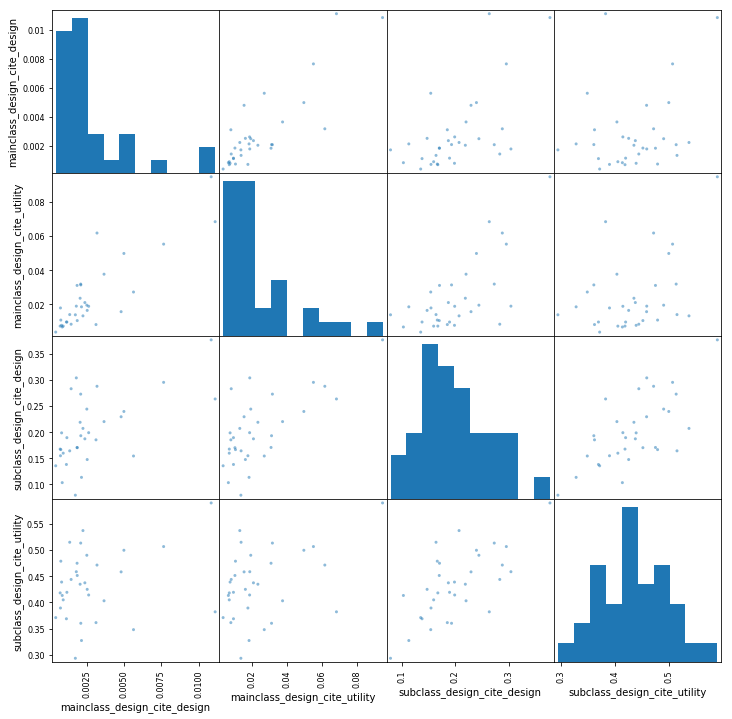

In [34]:
pd.plotting.scatter_matrix(main, figsize=[12,12])

# Continuous mainclass Analysis

In [35]:
def commonness_to_novelty(df):
    df['novelty'] = np.log(df['commonness'])*(-1)
    return df

In [36]:
def median_by_patent_num(df):
    novelty_median = df.groupby(['patent_number'])['novelty'].median().to_frame().reset_index()\
    .rename(index=str, columns={'novelty':'median_novelty'})
    return novelty_median

In [37]:
def median_novelty_all_classes(df,column_name):
    table = df.groupby(column_name)['median_novelty'].median().to_frame().reset_index()
    return table

In [38]:
def median_novelty_main_class(df,column_name):
    table = df.groupby(column_name)['median_novelty'].median().to_frame().reset_index()
    return table

In [39]:
def label_classes(df,column_name):
    df['name'] = df[column_name].map(design_class_dictionary.class_labels)
    return df

In [41]:
d2d_seen_cont.head()

,patent_number,priority_date,cite_mainclass,focal_mainclass,first_seen,Nt,Nijt,Nit,Nij,commonness,novelty,median_novelty,mainclass_id,sequence
0,D258382,1980,D23,D23,0,3970,200,598,598,2.220333,-0.797657,-0.797657,D23,0.0
1,D258383,1980,D23,D23,0,3970,200,598,598,2.220333,-0.797657,-0.797657,D23,0.0
2,D258678,1980,D23,D23,0,3970,200,598,598,2.220333,-0.797657,-0.797657,D23,0.0
3,D258755,1980,D23,D23,0,3970,200,598,598,2.220333,-0.797657,-0.797657,D23,0.0
4,D258990,1980,D25,D25,0,3970,78,289,289,3.707571,-1.310377,0.777764,D25,0.0


In [42]:
# #setting up
d2d_seen_cont = commonness_to_novelty(d2d_seen_cont)
d2d_cont_median_novelty = median_by_patent_num(d2d_seen_cont)
d2d_seen_cont = pd.merge(d2d_seen_cont, d2d_cont_median_novelty, on='patent_number', how='left')
d2d_seen_cont = pd.merge(d2d_seen_cont, patent_classifications, on='patent_number', how='left')

# first method
d2d_cont_table_all = median_novelty_all_classes(d2d_seen_cont,'focal_mainclass')
d2d_cont_table_all = label_classes(d2d_cont_table_all, 'focal_mainclass')

#second method
d2d_cont_table_main = median_novelty_main_class(d2d_seen_cont, 'mainclass_id')
d2d_cont_table_main = label_classes(d2d_cont_table_main,'mainclass_id')

In [46]:
# #setting up
d2u_seen_cont = commonness_to_novelty(d2u_seen_cont)
d2u_cont_median_novelty = median_by_patent_num(d2u_seen_cont)
d2u_seen_cont = pd.merge(d2u_seen_cont, d2u_cont_median_novelty, on='patent_number', how='left')
d2u_seen_cont = pd.merge(d2u_seen_cont, patent_classifications, on='patent_number', how='left')

# first method
d2u_cont_table_all = median_novelty_all_classes(d2u_seen_cont, 'focal_mainclass')
d2u_cont_table_all = label_classes(d2u_cont_table_all, 'focal_mainclass')

#second method
d2u_cont_table_main = median_novelty_main_class(d2u_seen_cont, 'mainclass_id')
d2u_cont_table_main = label_classes(d2u_cont_table_main,'mainclass_id')

In [47]:
df1 = d2d_cont_table_main.rename(index=str, columns={'median_novelty':'design_cite_design_main_class'})

In [48]:
df2 = d2d_cont_table_all.rename(index=str, columns={'median_novelty':'design_cite_design_all_classes'})

In [49]:
df3 = d2u_cont_table_main.rename(index=str, columns={'median_novelty':'design_cite_utility_main_classes'})

In [50]:
df4 = d2u_cont_table_all.rename(index=str, columns={'median_novelty':'design_cite_utility_all_classes'})

In [51]:
total = pd.merge(df1, df2)
total = pd.merge(total, df3)
total = pd.merge(total, df4)
total.head()

,mainclass_id,design_cite_design_main_class,name,focal_mainclass,design_cite_design_all_classes,design_cite_utility_main_classes,design_cite_utility_all_classes
0,D01,0.641893,Edible Products,D01,0.650593,-1.646520,-1.646520
1,D02,-1.481058,Apparel and Haberdashery,D02,-1.481058,-1.467828,-1.436201
2,D03,1.119594,"Travel Goods, Personal Belongings, and Storage...",D03,1.130378,-0.664472,-0.656893
3,D04,-0.550149,Brushware,D04,-0.529835,-1.764574,-1.751577
4,D05,0.580310,Textile or Paper Yard Goods; Sheet Material,D05,0.580310,-1.851823,-1.865339


In [52]:
total.corr()

,design_cite_design_main_class,design_cite_design_all_classes,design_cite_utility_main_classes,design_cite_utility_all_classes
design_cite_design_main_class,1.000000,0.989169,0.397368,0.431596
design_cite_design_all_classes,0.989169,1.000000,0.289744,0.338553
design_cite_utility_main_classes,0.397368,0.289744,1.000000,0.986252
design_cite_utility_all_classes,0.431596,0.338553,0.986252,1.000000


In [53]:
total.corr().to_csv('data/continuous_mainclass_correlations.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f8b7f84a8>,
      dtype=object)

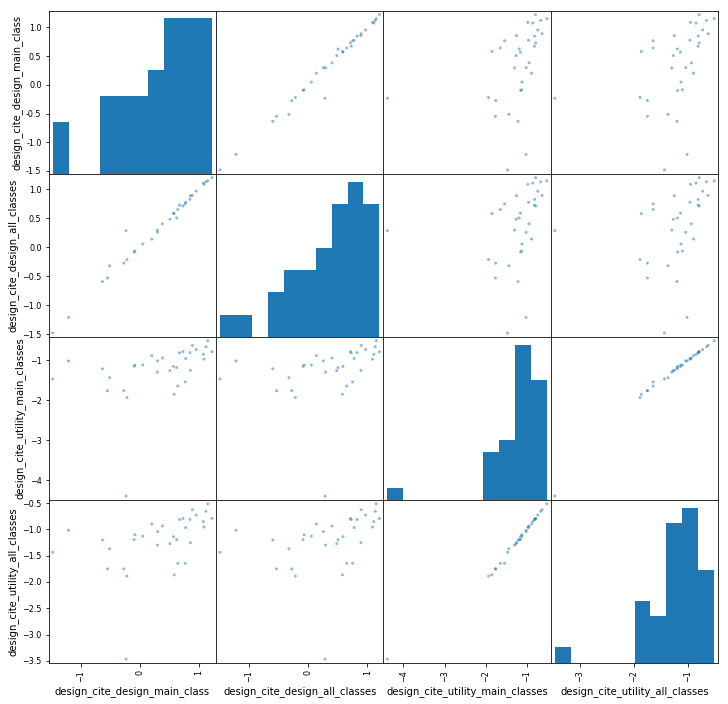

In [54]:
pd.plotting.scatter_matrix(total, figsize=[12,12])

# Continuous subclass analysis

In [55]:
#setting up
d2d_sub_seen_cont = commonness_to_novelty(d2d_sub_seen_cont)
d2d_cont_median_novelty = median_by_patent_num(d2d_sub_seen_cont)
d2d_sub_seen_cont = pd.merge(d2d_sub_seen_cont, d2d_cont_median_novelty, on='patent_number', how='left')
d2d_sub_seen_cont = pd.merge(d2d_sub_seen_cont, patent_classifications, on='patent_number', how='left')
d2d_sub_seen_cont[['main','sub']] = d2d_sub_seen_cont['focal_subclass'].str.split('/', expand=True)
d2d_sub_seen_cont['main'] = d2d_sub_seen_cont['main'].replace(design_class_dictionary.class_dictionary)
d2d_sub_seen_cont['mainclass_id'] = d2d_sub_seen_cont['mainclass_id'].replace(design_class_dictionary.class_dictionary)

#first_method
d2d_cont_sub_table_all = median_novelty_all_classes(d2d_sub_seen_cont, 'main')
d2d_cont_sub_table_all = label_classes(d2d_cont_sub_table_all,'main')

#second_method
d2d_cont_sub_table_main= median_novelty_main_class(d2d_sub_seen_cont, 'mainclass_id')
d2d_cont_sub_table_main = label_classes(d2d_cont_sub_table_main,'mainclass_id')

In [56]:
#setting up
d2u_sub_seen_cont = commonness_to_novelty(d2u_sub_seen_cont)
d2u_cont_median_novelty = median_by_patent_num(d2u_sub_seen_cont)
d2u_sub_seen_cont = pd.merge(d2u_sub_seen_cont, d2u_cont_median_novelty, on='patent_number', how='left')
d2u_sub_seen_cont = pd.merge(d2u_sub_seen_cont, patent_classifications, on='patent_number', how='left')
d2u_sub_seen_cont[['main','sub']] = d2u_sub_seen_cont['focal_subclass'].str.split('/', expand=True)
d2u_sub_seen_cont['main'] = d2u_sub_seen_cont['main'].replace(design_class_dictionary.class_dictionary)
d2u_sub_seen_cont['mainclass_id'] = d2u_sub_seen_cont['mainclass_id'].replace(design_class_dictionary.class_dictionary)

#first_method
d2u_cont_sub_table_all = median_novelty_all_classes(d2u_sub_seen_cont, 'main')
d2u_cont_sub_table_all = label_classes(d2u_cont_sub_table_all,'main')

#second_method
d2u_cont_sub_table_main= median_novelty_main_class(d2u_sub_seen_cont, 'mainclass_id')
d2u_cont_sub_table_main = label_classes(d2u_cont_sub_table_main,'mainclass_id')

In [57]:
df1 = d2d_cont_sub_table_all.rename(index=str, columns={'median_novelty':'subclass_design_cite_design_all_classes'})

In [58]:
df2 = d2d_cont_sub_table_main.dropna().\
rename(index=str, columns={'median_novelty':'subclass_design_cite_design_main_class'})

In [59]:
df3 = d2u_cont_sub_table_all.rename(index=str, columns={'median_novelty':'subclass_design_cite_utility_all_classes'})

In [60]:
df4 = d2u_cont_sub_table_main.dropna().\
rename(index=str, columns={'median_novelty':'subclass_design_cite_utility_main_class'})

In [61]:
subclass_total = pd.merge(df1, df2)
subclass_total = pd.merge(subclass_total, df3)
subclass_total = pd.merge(subclass_total, df4)
subclass_total.head()

,main,subclass_design_cite_design_all_classes,name,mainclass_id,subclass_design_cite_design_main_class,subclass_design_cite_utility_all_classes,subclass_design_cite_utility_main_class
0,D01,-3.804151,Edible Products,D01,-3.794427,-5.701739,-5.672553
1,D02,-2.267245,Apparel and Haberdashery,D02,-2.264685,-4.946146,-4.940403
2,D03,-2.875997,"Travel Goods, Personal Belongings, and Storage...",D03,-2.875997,-4.671166,-4.681045
3,D04,-3.866655,Brushware,D04,-3.884888,-5.213314,-5.213457
4,D05,-4.015995,Textile or Paper Yard Goods; Sheet Material,D05,-4.052618,-5.013565,-5.015936


In [62]:
subclass_total.corr()

,subclass_design_cite_design_all_classes,subclass_design_cite_design_main_class,subclass_design_cite_utility_all_classes,subclass_design_cite_utility_main_class
subclass_design_cite_design_all_classes,1.000000,0.998503,0.792517,0.795393
subclass_design_cite_design_main_class,0.998503,1.000000,0.787192,0.792124
subclass_design_cite_utility_all_classes,0.792517,0.787192,1.000000,0.998530
subclass_design_cite_utility_main_class,0.795393,0.792124,0.998530,1.000000


In [63]:
subclass_total.corr().to_csv('data/continuous_subclass_correlations.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ef6e1f4e0>,
      dtype=object)

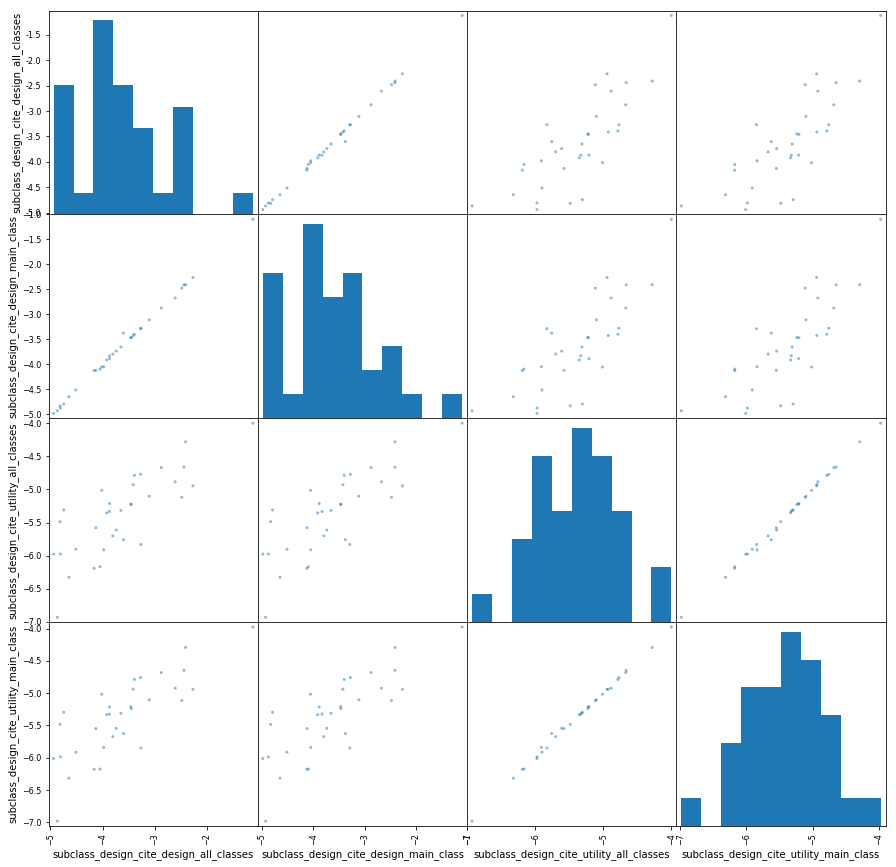

In [64]:
pd.plotting.scatter_matrix(subclass_total, figsize=[15,15])

In [65]:
complete = pd.merge(total[['focal_mainclass','design_cite_design_main_class','name','design_cite_utility_main_classes']],\
                    subclass_total[['main','subclass_design_cite_design_main_class','name','subclass_design_cite_utility_main_class']])

In [66]:
complete.corr()

,design_cite_design_main_class,design_cite_utility_main_classes,subclass_design_cite_design_main_class,subclass_design_cite_utility_main_class
design_cite_design_main_class,1.000000,0.397368,0.325261,0.299662
design_cite_utility_main_classes,0.397368,1.000000,0.324134,0.489595
subclass_design_cite_design_main_class,0.325261,0.324134,1.000000,0.792124
subclass_design_cite_utility_main_class,0.299662,0.489595,0.792124,1.000000


In [67]:
complete.corr().to_csv('data/continuous_main_and_subclass_correlation.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ef72fc320>,
      dtype=object)

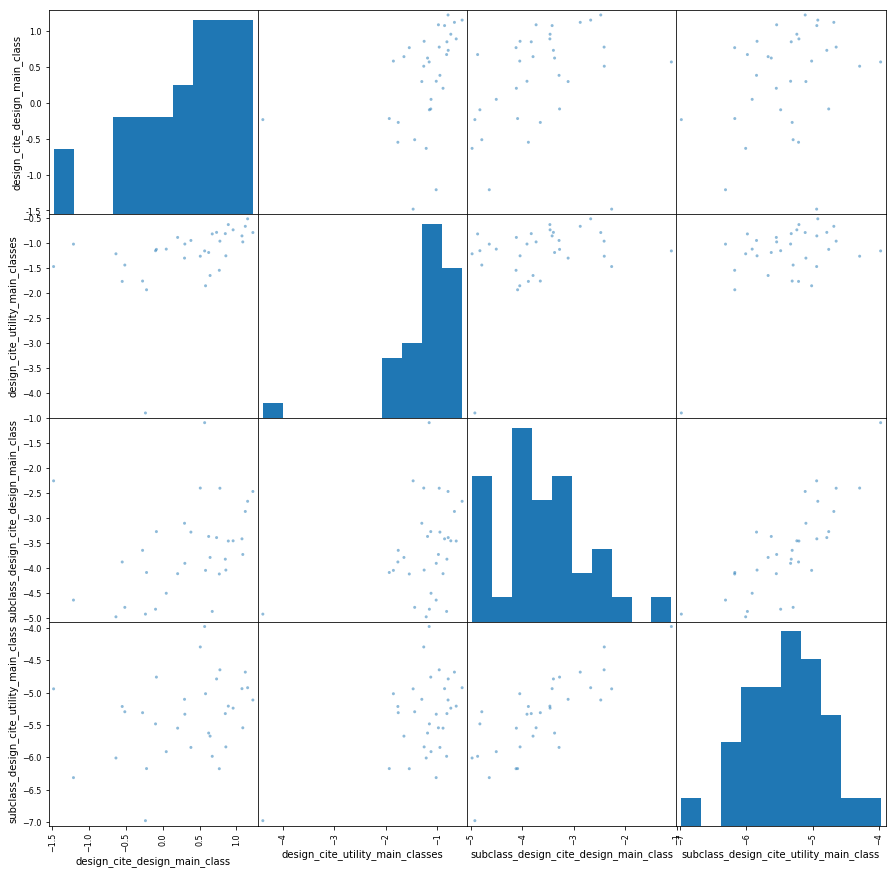

In [68]:
pd.plotting.scatter_matrix(complete, figsize=[15,15])

# Save the data!

In [39]:
# #discrete 
# d2d_main_table.to_csv('data/d2d_main_table.csv')
# d2u_main_table.to_csv('data/d2u_main_table.csv')
# d2d_sub_table.to_csv('data/d2d_sub_table.csv')
# d2u_sub_table.to_csv('data/d2u_sub_table.csv')

In [40]:
# #cotinuous
# d2d_cont_table_all.to_csv('data/d2d_cont_table_all.csv')
# d2d_cont_table_main.to_csv('data/d2d_cont_table_main.csv')

# d2u_cont_table_all.to_csv('data/d2u_cont_table_all.csv')
# d2u_cont_table_main.to_csv('data/d2u_cont_table_main.csv')

# d2d_cont_sub_table_all.to_csv('data/d2d_cont_sub_table_all.csv')
# d2d_cont_sub_table_main.to_csv('data/d2d_cont_sub_table_main.csv')

# d2u_cont_sub_table_all.to_csv('data/d2u_cont_sub_table_all.csv')
# d2u_cont_sub_table_main.to_csv('data/d2u_cont_sub_table_main.csv')

How many focal patents have multiple mainclasses?

In [41]:
# final = pd.read_csv('data/final.csv',usecols=['patent_number','focal_mainclass'])
# final.head()

In [42]:
# final.drop_duplicates(inplace=True)
# final.head()

In [43]:
# num_mainclass = final.groupby('patent_number')['focal_mainclass'].count()
# len(num_mainclass)

In [44]:
# len(num_mainclass.loc[num_mainclass > 1])

In [45]:
#ratio of patents with more than 1 mainclass
# 34418/503107

# Correlations

Continuous